<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
########################################## Answer:##################################################
movies.shape

(979, 6)

#### Check the data type of each column.

In [4]:
########################################## Answer:##################################################
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
########################################## Answer:##################################################
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
########################################## Answer:##################################################

## Sort by ascending movie duration
movies.sort_values('duration').head(1)

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."


In [7]:
## Sort by descending movie duration
movies.sort_values('duration', ascending=False).head(1)

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

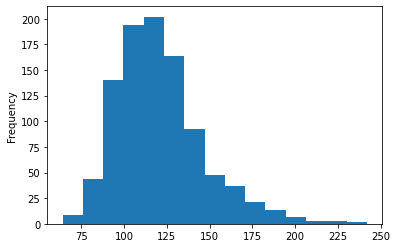

In [8]:
########################################## Answer:##################################################

movies.duration.plot(kind='hist', bins=15);

#### Use a box plot to display that same data.

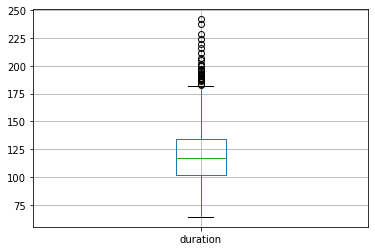

In [9]:
########################################## Answer:##################################################

movies.boxplot('duration');

## Intermediate level

#### Count how many movies have each of the content ratings.

In [10]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [11]:
########################################## Answer:##################################################

movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

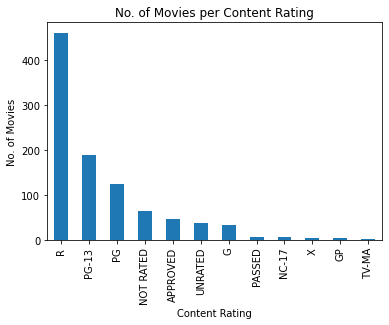

In [12]:
########################################## Answer:##################################################
rating = movies.content_rating.value_counts()

rating.plot(kind='bar', title='No. of Movies per Content Rating', xlabel='Content Rating', ylabel='No. of Movies');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [13]:
########################################## Answer:##################################################

# Replace value by using .replace and inplace=True to overwrite in the original dataframe
movies.content_rating.replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'], 'UNRATED', inplace=True)

In [14]:
# Recheck content_rating to make sure the above values have been replaced in the dataframe
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [15]:
########################################## Answer:##################################################

# Replace value by using .replace and inplace=True to overwrite in the original dataframe
movies.content_rating.replace(['X', 'TV-MA'], 'NC-17', inplace=True)

In [16]:
# Recheck content_rating
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [17]:
########################################## Answer:##################################################
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [18]:
########################################## Answer:##################################################

# Replace the missing value with UNRATED and inplace=True to overwrite in the original dataframe
movies.content_rating.fillna(value='UNRATED', inplace=True)

In [19]:
# Recheck if there are still any missing values (there are none! Hooray!)
movies.isnull().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [20]:
########################################## Answer:##################################################

## 2 hours = 120 minutes
print('Avg star rating for movies 2 hours or longer: ', movies[movies.duration >= 120].star_rating.mean())
print('Avg star rating for movies shorter than 2 hours: ', movies[movies.duration < 120].star_rating.mean())

Avg star rating for movies 2 hours or longer:  7.948898678414082
Avg star rating for movies shorter than 2 hours:  7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

             star_rating  duration
star_rating     1.000000  0.227149
duration        0.227149  1.000000


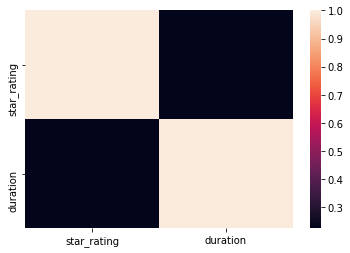

In [21]:
########################################## Answer:##################################################

# Use heatmap to check on correlation (No correlation)
import seaborn as sns
print(movies.corr())
sns.heatmap(movies.corr());

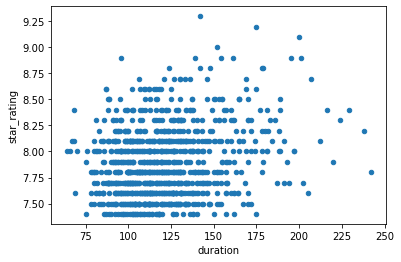

In [22]:
# Alternatively, use scatterplot

movies.plot(kind='scatter', x='duration', y='star_rating');

#### Calculate the average duration for each genre.

In [23]:
########################################## Answer:##################################################

movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


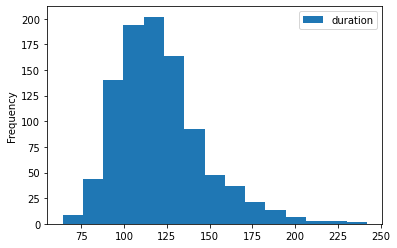

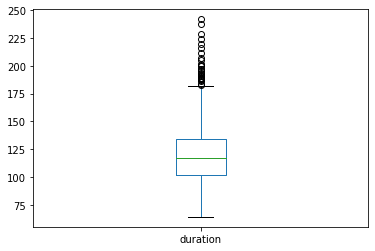

In [24]:
########################################## Answer:##################################################

print(movies.plot(kind='hist', x='content_rating', y='duration', bins=15))
print(movies.plot(kind='box', x='content_rating', y='duration'))

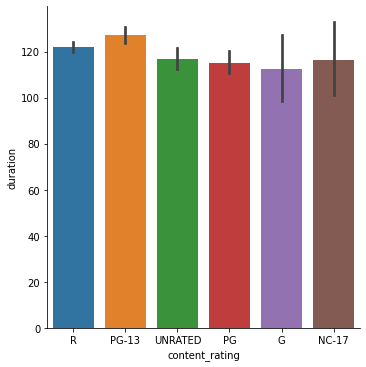

In [25]:
sns.catplot(x="content_rating", y="duration", kind="bar", data=movies)

#### Determine the top rated movie (by star rating) for each genre.

In [26]:
########################################## Answer:##################################################

## Sort by star rating in descending order and group by genre. first() will return the first data 
movies.sort_values('star_rating', ascending=False).groupby('genre').first()

,star_rating,title,content_rating,duration,actors_list
genre,,,,,
Action,9.0,The Dark Knight,PG-13,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
Adventure,8.9,The Lord of the Rings: The Return of the King,PG-13,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
Animation,8.6,Spirited Away,PG,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."
Biography,8.9,Schindler's List,R,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
Comedy,8.6,Modern Times,G,87,"[u'Charles Chaplin', u'Paulette Goddard', u'He..."
Crime,9.3,The Shawshank Redemption,R,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
Drama,8.9,12 Angry Men,UNRATED,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
Family,7.9,E.T. the Extra-Terrestrial,PG,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C..."
Fantasy,7.7,The City of Lost Children,R,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [27]:
########################################## Answer:##################################################

## Check movies with same title
movies[movies.title.duplicated()]

,star_rating,title,content_rating,genre,duration,actors_list
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [28]:
## Check how many movies with the same title have same actors_list
duplicate_actor = movies[movies.actors_list.duplicated()]

movies[movies.title.isin(duplicate_actor)]   # There are no same movie title with the same actors (no duplicates)

,star_rating,title,content_rating,genre,duration,actors_list


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [29]:
########################################## Answer:##################################################

#### Check type of genre available
movies.value_counts('genre')

genre
Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
Fantasy        1
History        1
dtype: int64

In [30]:
#### Manually create list of relevant genres that have at least at least 10 movies
relevant_genre = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']

#### Use .isin to filter a DataFrame using a list & calculate the average star rating for each genre
movies[movies.genre.isin(relevant_genre)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [31]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [32]:
# Answer:
# Create a function to get average star rating for a specific genre

#### Option 4: aggregate by count and mean, then filter using the count

In [33]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!

In [34]:
movies[movies.actors_list.duplicated()]

,star_rating,title,content_rating,genre,duration,actors_list
19,8.7,Star Wars,PG,Action,121,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
80,8.4,Star Wars: Episode VI - Return of the Jedi,PG,Action,134,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
414,7.9,Toy Story 2,G,Animation,92,"[u'Tom Hanks', u'Tim Allen', u'Joan Cusack']"
520,7.8,Back to the Future Part II,PG,Adventure,108,"[u'Michael J. Fox', u'Christopher Lloyd', u'Le..."
551,7.8,Harry Potter and the Prisoner of Azkaban,PG,Adventure,142,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
642,7.7,Harry Potter and the Deathly Hallows: Part 1,PG-13,Adventure,146,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
727,7.6,Harry Potter and the Goblet of Fire,PG-13,Adventure,157,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
814,7.6,The Hobbit: The Battle of the Five Armies,PG-13,Adventure,144,"[u'Ian McKellen', u'Martin Freeman', u'Richard..."
891,7.5,Harry Potter and the Half-Blood Prince,PG,Adventure,153,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
932,7.4,Harry Potter and the Order of the Phoenix,PG-13,Adventure,138,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."


In [35]:
duplicate_actor = movies[movies.actors_list.duplicated()]

duplicate_actor.value_counts('actors_list')

# In this dataframe, Daniel Radcliffe, Emma Watson, Rupert Grint had the most no. movies where they starred together 

actors_list
[u'Daniel Radcliffe', u'Emma Watson', u'Rupert Grint']        5
[u'Mark Hamill', u'Harrison Ford', u'Carrie Fisher']          2
[u'Ian McKellen', u'Martin Freeman', u'Richard Armitage']     1
[u'Michael J. Fox', u'Christopher Lloyd', u'Lea Thompson']    1
[u'Tom Hanks', u'Tim Allen', u'Joan Cusack']                  1
dtype: int64